<a href="https://colab.research.google.com/github/MariaLFreitas/Machine_learning/blob/main/L06_gaussiandistribution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Distribuição gaussiana na base breast cancer

In [ ]:
import numpy as np
import pandas as pd
import pylab as py 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import sklearn
from sklearn.preprocessing import StandardScaler

import scipy as sp

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/Metodos de aprendizagem/breast_cancer/data.csv')

Mounted at /content/drive


In [ ]:
d = { 'M': 0,
      'B': 1}
df = pd.read_csv('/content/drive/MyDrive/Metodos de aprendizagem/breast_cancer/data.csv')
df.drop(['Unnamed: 32'], axis=1, inplace=True)

df['diagnosis'] = df['diagnosis'].map(d)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = df.to_numpy()
y= df['diagnosis'].values

In [ ]:
def descritive(x):
    # calculating descriptives of variable
    min = np.min(x)
    max = x.max()
    ran = x.max()-x.min()
    mean = x.mean()
    median = np.median(x)
    std = x.std()
    skew = sp.stats.skew(x)
    kurt = sp.stats.kurtosis(x)
    x

    # calculating points of standard deviation
    points = mean-std, mean+std

    # plotting the variable with every information
    sns.distplot(x,hist=True, kde=True)
    
    sns.lineplot(points, [0,0], color = 'black', label = "std")
    sns.scatterplot([min,max], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.ylabel('density')
    print(f'std {round(mean-std,2)} {round(mean+std,2)}') 
    print(f'kurtosis {round(kurt,2)}') 
    print(f'skewnees {round(skew,2)}') 
    print(f'range {round(min,2),round(max,2),round(ran,2)}') 
    print(f'mean {round(mean,2)}') 
    print(f'median {round(median,2)}')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/lo

std 0.13 0.68
kurtosis 17.52
skewnees 3.08
range (0.11, 2.87, 2.76)
mean 0.41
median 0.32


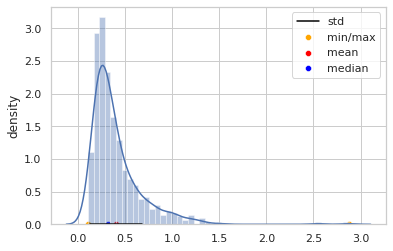

In [ ]:
descritive(X[:,12])

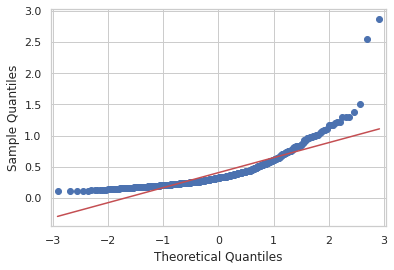

In [ ]:
sm.qqplot(X[:,12], line = 'r') 
py.show()

###Obtendo a correlação dos dados médios
Será calculado a correlação da coluna 1 a 12

In [ ]:
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


####Visualizando as correlações em um heatmap (mapa de calor)

- `plt.figure(figsize=(10,10))` - Aumentar o heatmap 

- `sns.heatmap(df.iloc[:,1:12].corr(), annot=True)` - Para visualizar os valores obtido no clacula a correlação

- `sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')` - para obter as porcentagens obtidas na correlação

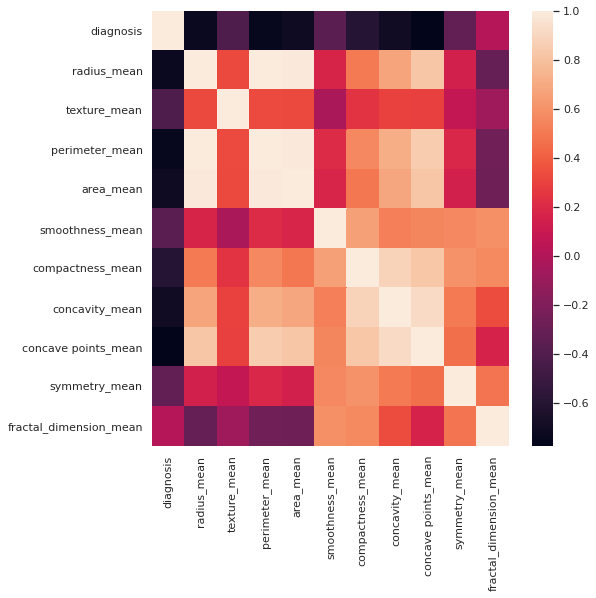

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:12].corr())

####Visualizando as covariâncias em um heatmap (mapa de calor)

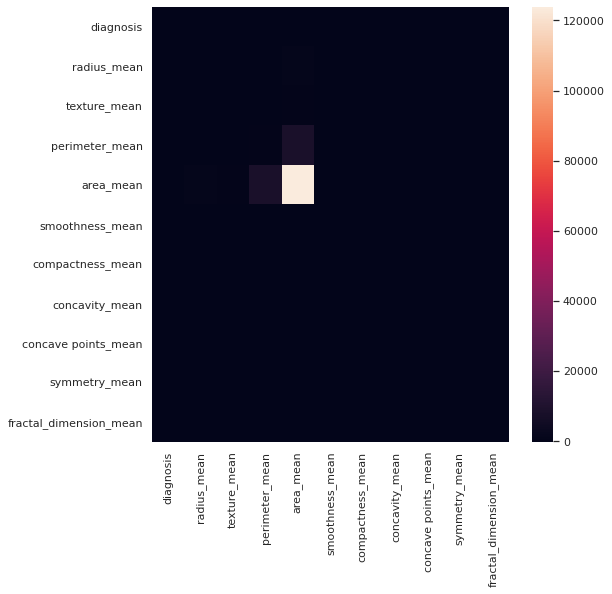

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,1:12].cov())

####Visualizando as correlações em um scatterplot

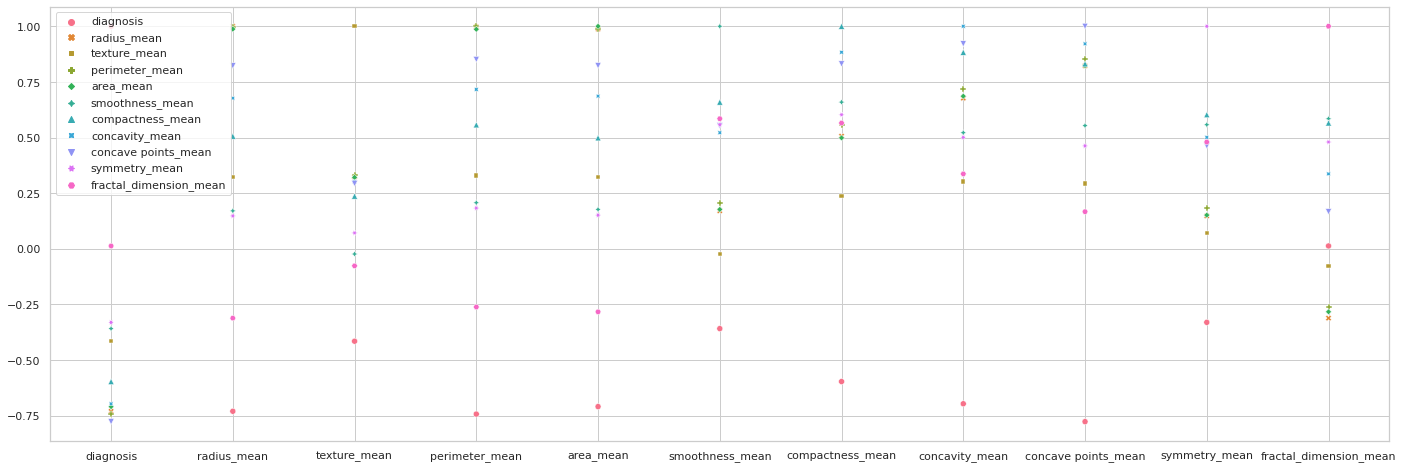

In [ ]:
plt.figure(figsize=(24,8))
corr = df.iloc[:,1:12].corr()
sns.scatterplot(data = corr)

####Visualizando as covariâncias em um scatterplot

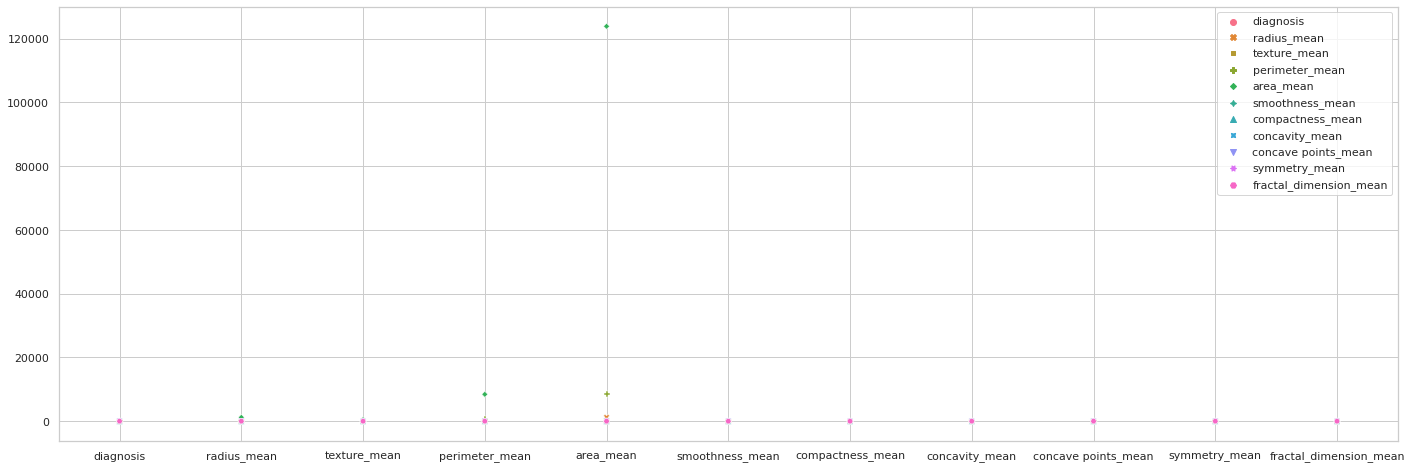

In [ ]:
plt.figure(figsize=(24,8))
cov= df.iloc[:,1:12].cov()
sns.scatterplot(data = cov)

In [ ]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


####Identificando outliers

In [ ]:
lower = df.iloc[:,1:12].mean() -df.iloc[:,1:12].std()
upper = df.iloc[:,1:12].mean() + df.iloc[:,1:12].std()
lower, upper

(diagnosis                   0.143499
 radius_mean                10.603243
 texture_mean               14.988613
 perimeter_mean             67.670052
 area_mean                 302.974975
 smoothness_mean             0.082296
 compactness_mean            0.051528
 concavity_mean              0.009080
 concave points_mean         0.010116
 symmetry_mean               0.153748
 fractal_dimension_mean      0.055737
 dtype: float64, diagnosis                    1.111334
 radius_mean                 17.651341
 texture_mean                23.590684
 perimeter_mean             116.268014
 area_mean                 1006.803233
 smoothness_mean              0.110424
 compactness_mean             0.157154
 concavity_mean               0.168519
 concave points_mean          0.087722
 symmetry_mean                0.208576
 fractal_dimension_mean       0.069858
 dtype: float64)

In [ ]:
#sns.set(style="whitegrid", color_codes=True)
#data = df.iloc[:,1:12]
#plt.boxplot(data)